In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sensor_data_analysis_api import *
import matplotlib.dates as dates
from datetime import timedelta

In [2]:
def plot_signal(df,signals,stTime,EndTime,season):
    start = pd.to_datetime(stTime, format='%Y%m%d', infer_datetime_format=True)
    end = pd.to_datetime(EndTime, format='%Y%m%d', infer_datetime_format=True)
    if start == end:
        end = end+timedelta(days=1)
    df = df[(df.time>=start)&(df.time<=end)]
    df= df.set_index("time")
    if len(signals) == 2:
        
        ax = plt.plot()
        ax = df[signals[0]].dropna().plot(figsize=(22,12),legend=True,grid=True,rot=45,color='b')
        ax.xaxis.set_major_locator(dates.MinuteLocator(interval=300))
        #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M:%S'))
        ax.xaxis.set_major_formatter(dates.DateFormatter('%A %I %p'))
        ax.set_ylabel(signals[0]+" values")
        df[signals[1]].dropna().plot(secondary_y=True,ax=ax,legend=True,grid=True,rot=45,color='r',alpha=0.7)
        ax.set_title("%s plot of" %(season) + " Signals "+" for room %s"%(df.location.unique()[0])+" for date range %s to %s"%(start.date(),end.date()))
        plt.ylabel(signals[1]+" values")
        ax.set_xlabel("Date & Time")
        plt.show()

In [4]:
### Get Signal Data for the room and for the Signals types

In [5]:
room = 'Rm-2138'
templates = ['Zone Temperature','Supply Airflow','Damper Position','Supply Airflow Setpoint']
dataDF3 = get_signal_dataframe(room, signals=templates, mean_type=None, use_weather_data=False)

Read file:  506_0_3000144.csv
Read file:  506_0_3000150.csv
Read file:  506_0_3000149.csv
Read file:  506_1_3000154.csv


#### What is this plot for?
To Identify Patterns between signals types and understand correlation between Signal types.

#### Observations 

A. We choose the below signals for the room Rm-2138 due to higher number of unique values available (high variance)

    1. Zone Temperature 2. Supply Airflow 3. Damper Position 4. Supply Airflow Setpoint 5. Heating Command 6. Cooling Command 

But for the date range selected 2014-04-27 - 2014-05-05 , Cooling Command is missing so we have to exclude from consideration. Also for the date range selected 2014-04-27 - 2014-05-05 , Heating Command is pretty much flat and not much variance, so we can choose to ignore Heating Command also. 

So we will continue with the following signals for the room and date range

    1. Zone Temperature 2. Supply Airflow 3. Damper Position 4. Supply Airflow Setpoint

##### Observation 2
  ### Summer Plot (Top) 
    1. On the Weekly scale, we can see Zone Temperature and Supply Airflow are clearly correlated
    2. Whenever Zone Temperature spikes, Supply Airflow also spikes
    3. Zone Temperature & Supply Airflow are the highest during the Nights between 10 PM and midnight.
    4. Zone Temperature & Supply Airflow are the lowest during the Noon between Noon and 5 PM.    
    5. Supply Airflow is the lowest during the day.    
  ### Winter Plot (Bottom) - Not much change 
    1. On the Weekly scale, we can see Zone Temperature and Supply Airflow are clearly correlated
    2. Whenever Zone Temperature spikes, Supply Airflow also spikes
    3. Zone Temperature & Supply Airflow are the highest during the Nights between 10 PM and midnight.
    4. Zone Temperature & Supply Airflow are the lowest during the Noon between Noon and 5 PM.    
    5. Supply Airflow is the lowest during the day.    

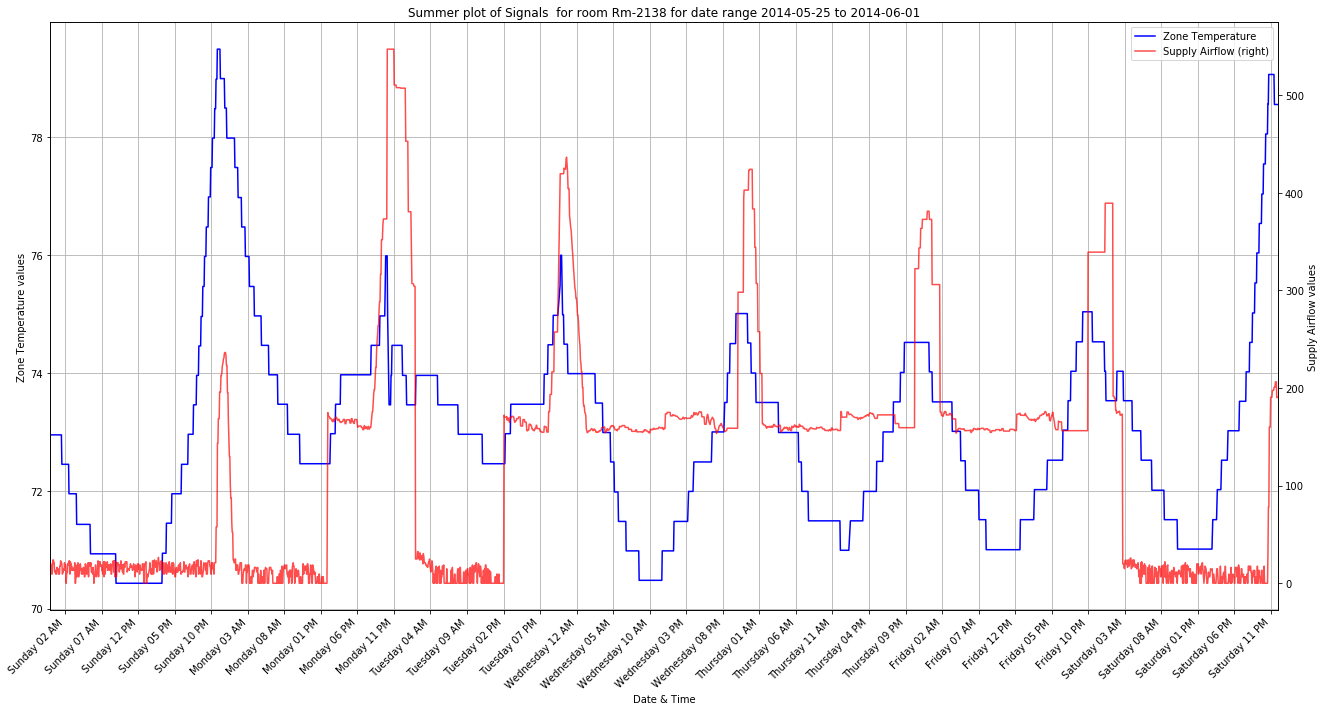

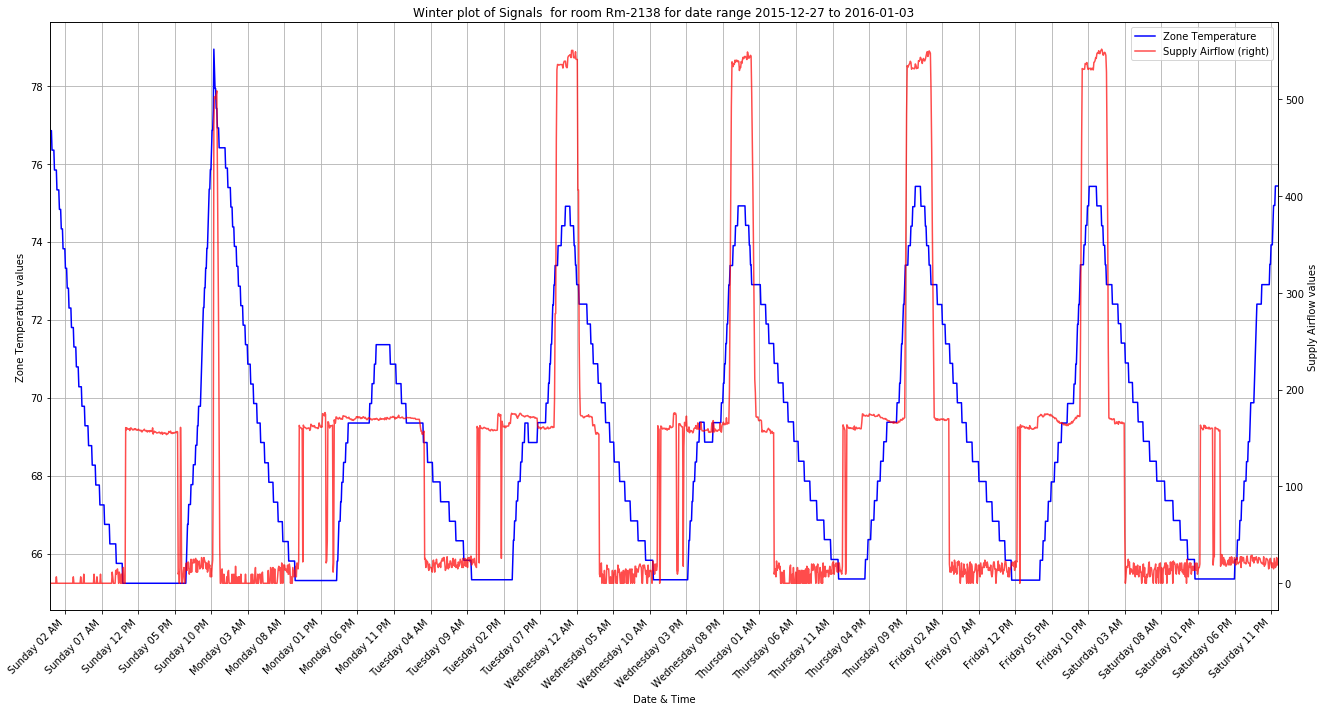

In [6]:

signals = ['Zone Temperature', 'Supply Airflow']
plot_signal(dataDF3,signals,"2014-05-25","2014-06-01","Summer")
plot_signal(dataDF3,signals,"2015-12-27","2016-01-03","Winter")

##### Observation 3
    1. Zone Temperature and Damper Postion follow the trend across all seasons

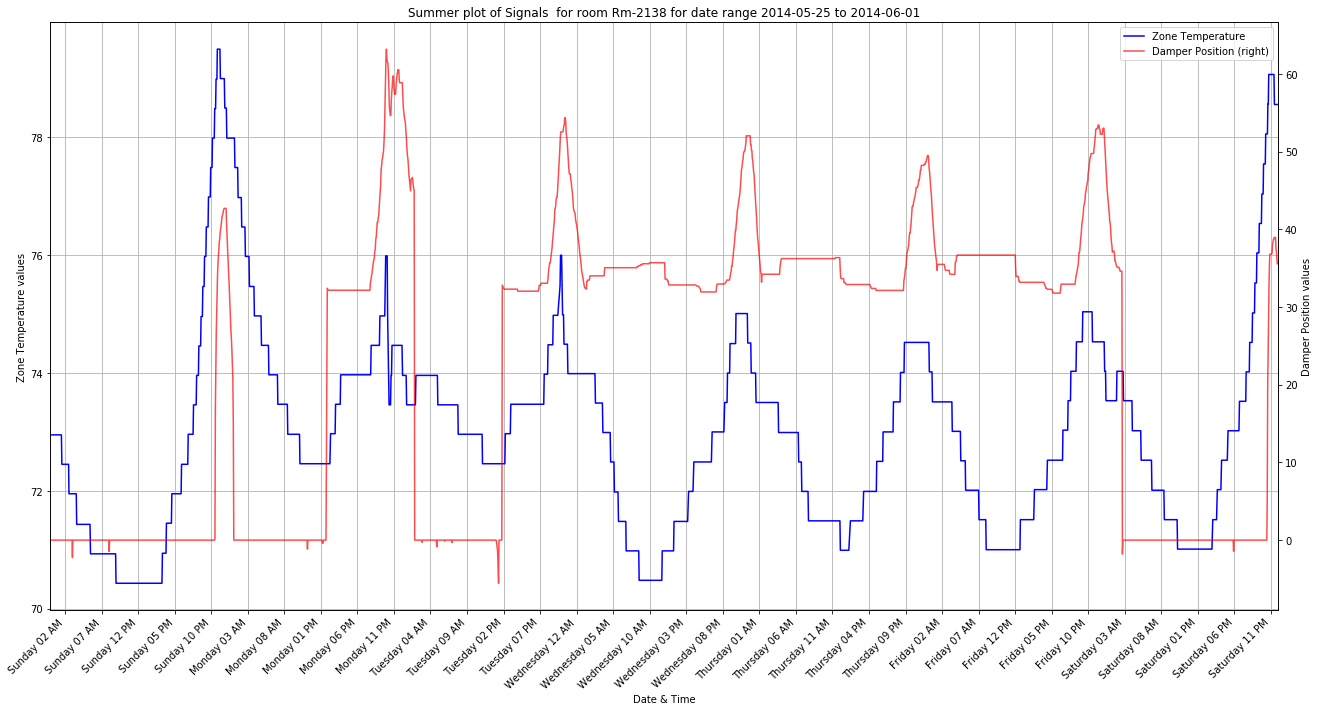

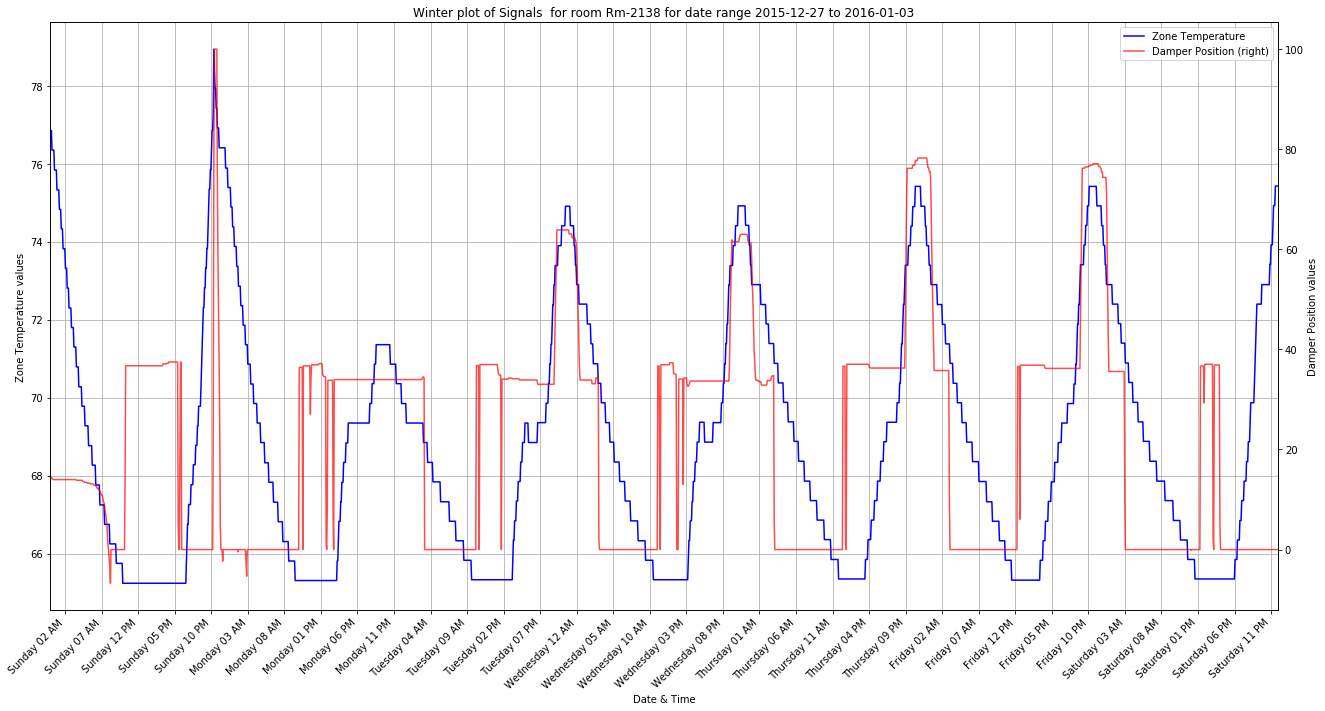

In [7]:
signals = ['Zone Temperature', 'Damper Position']
plot_signal(dataDF3,signals,"2014-05-25","2014-06-01","Summer")
plot_signal(dataDF3,signals,"2015-12-27","2016-01-03","Winter")

#### Observation 4
    1. Here the obersation 2 is very similar between Supply Airflow and Supply Airflow Setpoint

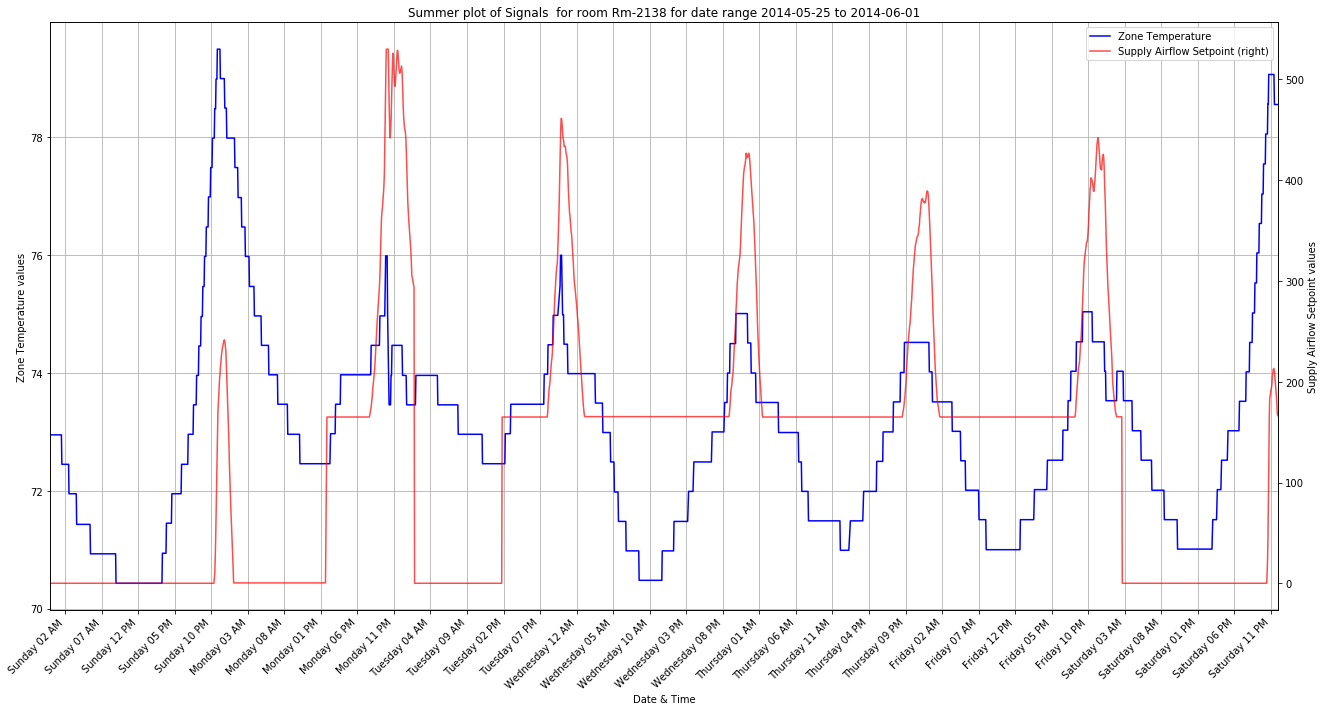

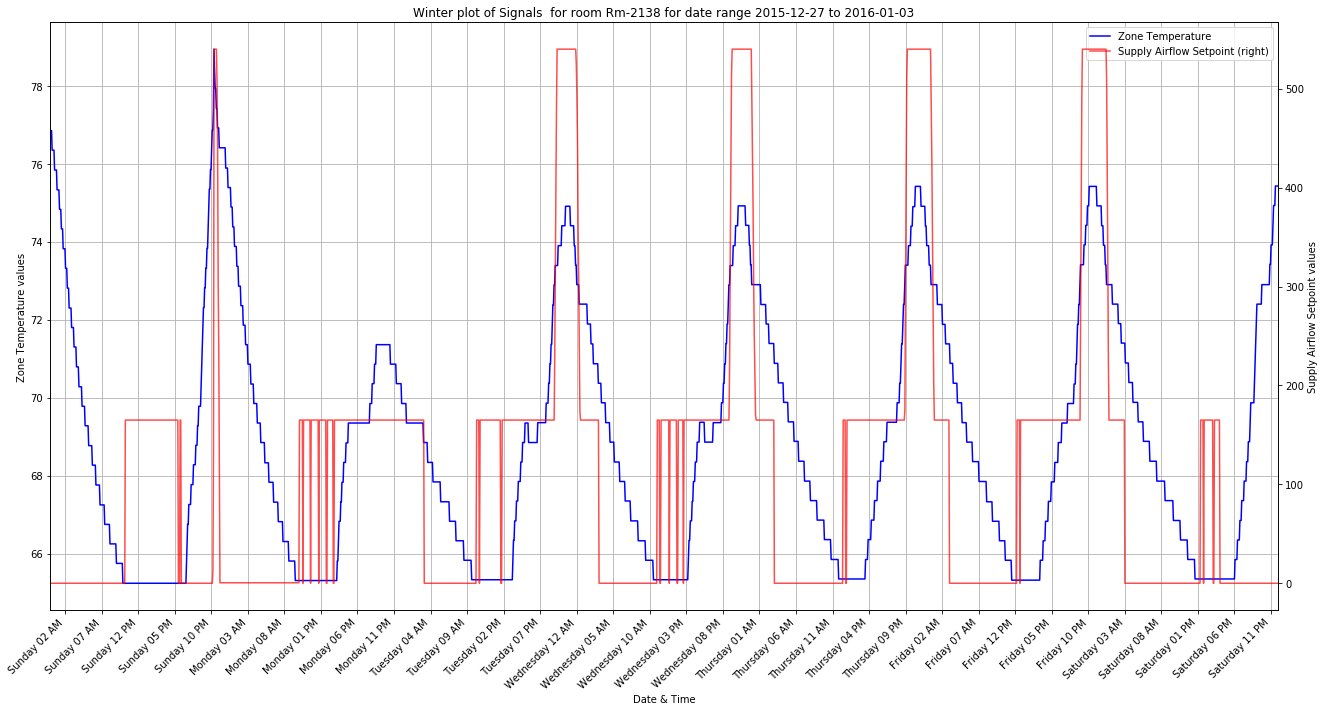

In [8]:
signals = ['Zone Temperature', 'Supply Airflow Setpoint']
plot_signal(dataDF3,signals,"2014-05-25","2014-06-01","Summer")
plot_signal(dataDF3,signals,"2015-12-27","2016-01-03","Winter")

#### Observation 6 
    1. We can tell Supply Airflow and Damper Position abosolutely correlates throughout the week
    2. The signals highly follow the same trend regardless or weekday or weekend or season

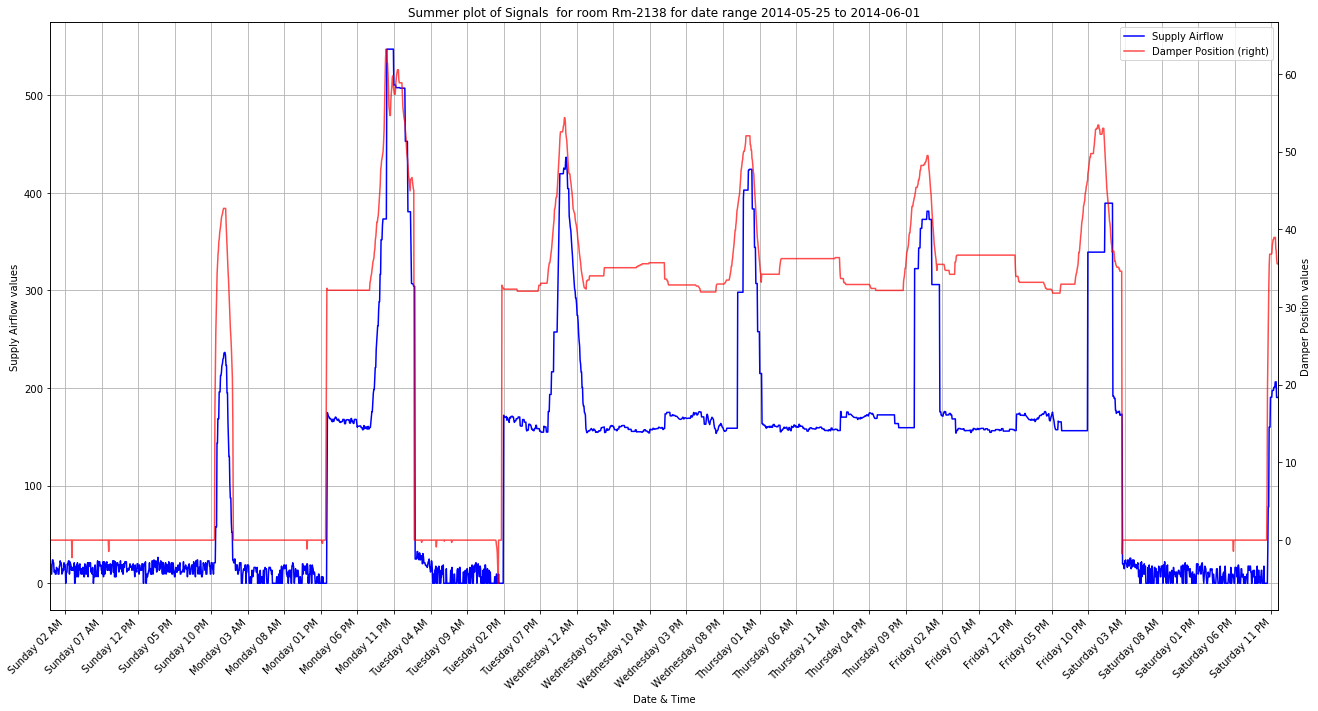

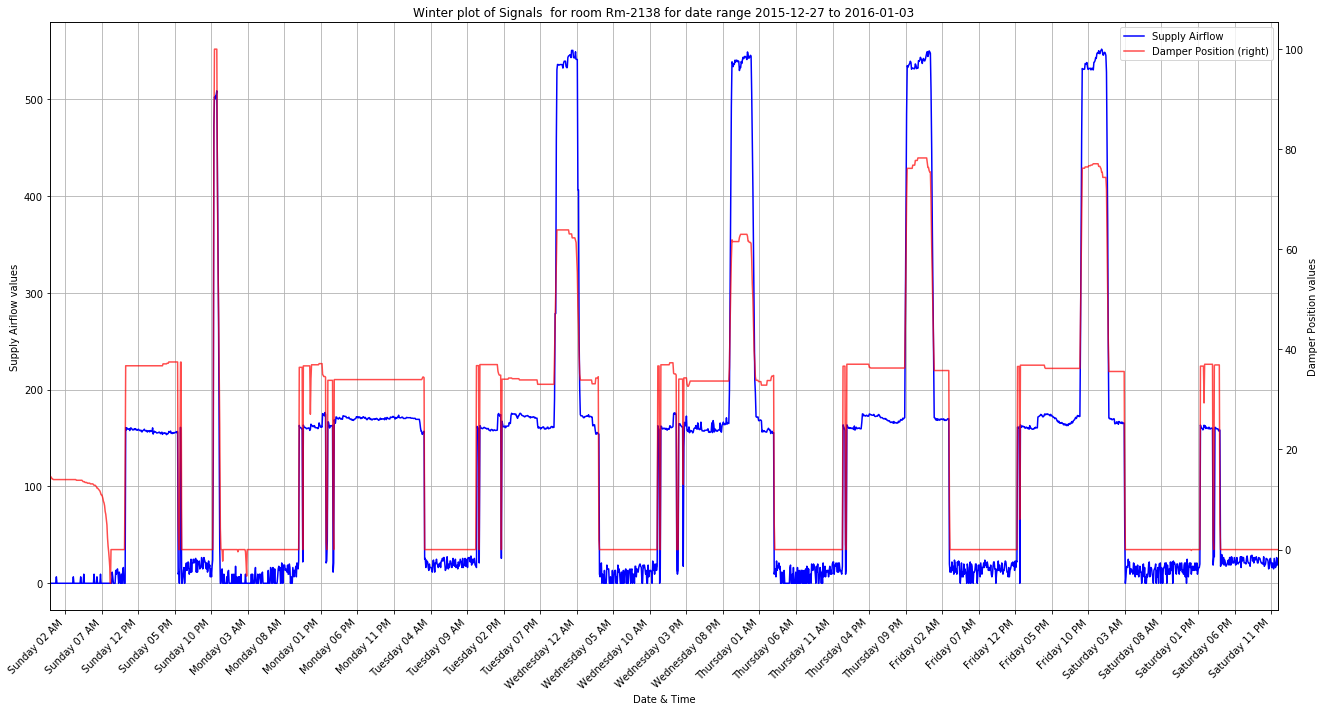

In [9]:
signals = ['Supply Airflow', 'Damper Position']
plot_signal(dataDF3,signals,"2014-05-25","2014-06-01","Summer")
plot_signal(dataDF3,signals,"2015-12-27","2016-01-03","Winter")

#### Observation 7
    1. We can easily tell both these signal types must be same or similar as one is setpoint and other is a recording

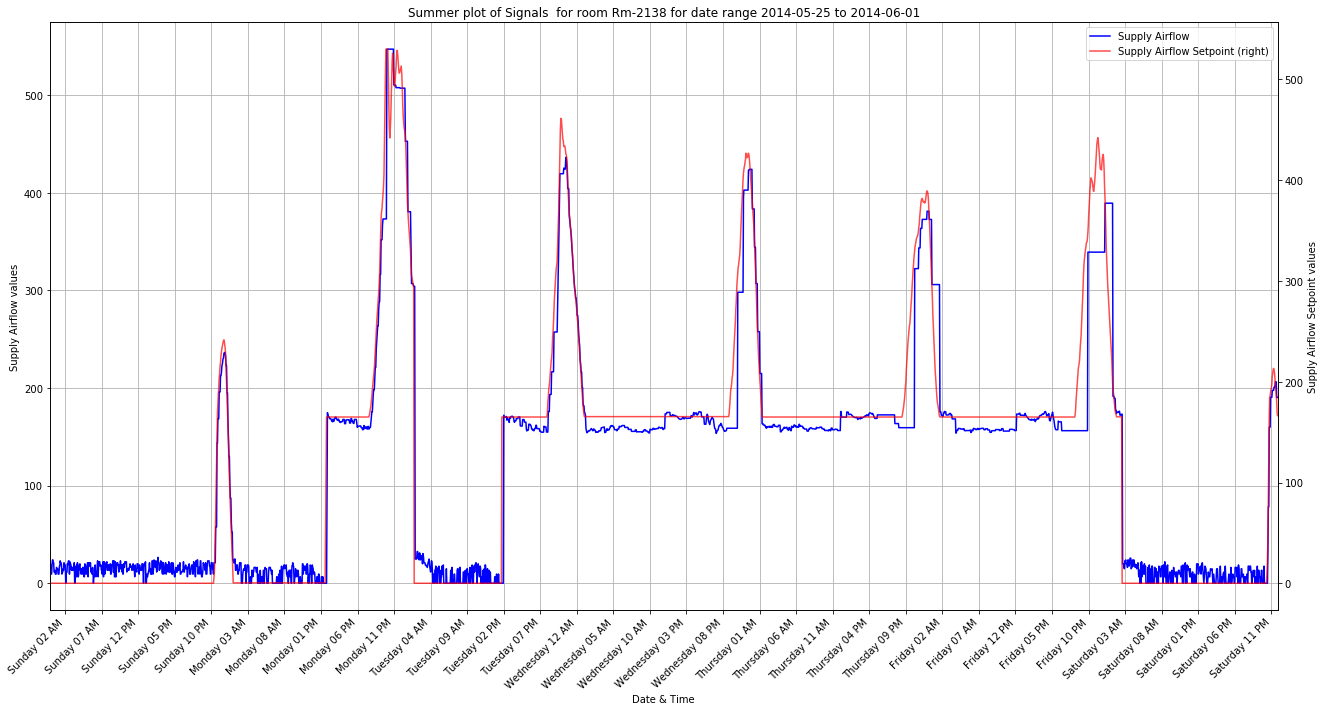

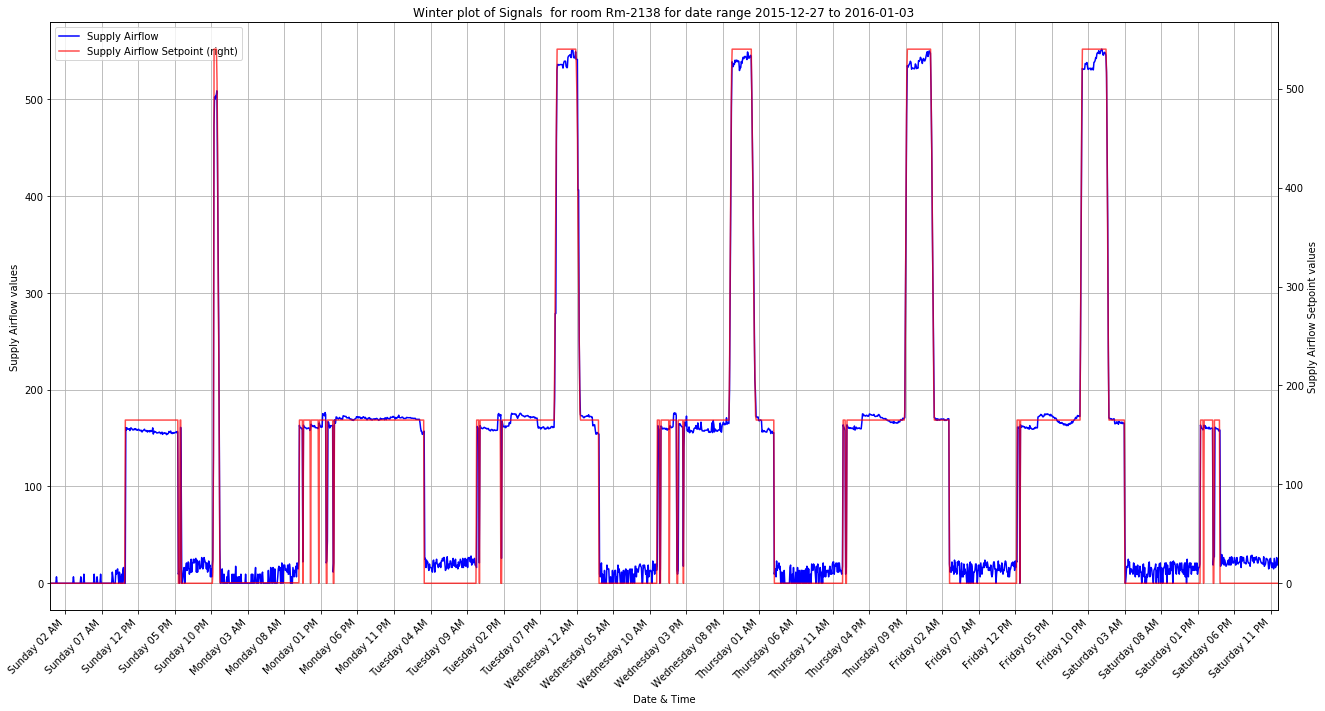

In [10]:
signals = ['Supply Airflow', 'Supply Airflow Setpoint']
plot_signal(dataDF3,signals,"2014-05-25","2014-06-01","Summer")
plot_signal(dataDF3,signals,"2015-12-27","2016-01-03","Winter")